In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

https://www.kaggle.com/new-york-city/nyc-property-sales

In [48]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

#Load data and specific set of columns of interest
df = pd.read_csv('nyc-rolling-sales.csv')
df_sales = df.loc[(df['SALE PRICE'].replace(' -  ','0').astype(float) > 0.00),['BOROUGH','RESIDENTIAL UNITS','COMMERCIAL UNITS','GROSS SQUARE FEET','LAND SQUARE FEET','SALE PRICE']]

#Update Boroughs
df_sales['BOROUGH'][df_sales['BOROUGH'] == 1] = 'Manhattan'
df_sales['BOROUGH'][df_sales['BOROUGH'] == 2] = 'Bronx'
df_sales['BOROUGH'][df_sales['BOROUGH'] == 3] = 'Brooklyn'
df_sales['BOROUGH'][df_sales['BOROUGH'] == 4] = 'Queens'
df_sales['BOROUGH'][df_sales['BOROUGH'] == 5] = 'Staten Island'

#SALE PRICE is object but should be numeric
df_sales['SALE PRICE'] = pd.to_numeric(df_sales['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
df_sales['LAND SQUARE FEET'] = pd.to_numeric(df_sales['LAND SQUARE FEET'], errors='coerce')
df_sales['GROSS SQUARE FEET']= pd.to_numeric(df_sales['GROSS SQUARE FEET'], errors='coerce')

#SALE DATE is object but should be datetime
#df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'], errors='coerce')


c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [49]:
df_sales.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,SALE PRICE
count,59759.000000,59759.000000,3.802000e+04,3.857100e+04,5.975900e+04
mean,1.728208,0.163172,3.574482e+03,3.776270e+03,1.494927e+06
std,14.159398,9.821318,3.007989e+04,4.502171e+04,1.232953e+07
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000,0.000000,8.835000e+02,1.426500e+03,3.700000e+05
50%,1.000000,0.000000,1.552000e+03,2.214000e+03,6.255000e+05
75%,2.000000,0.000000,2.352000e+03,3.325000e+03,1.070000e+06
max,1844.000000,2261.000000,3.750565e+06,4.252327e+06,2.210000e+09


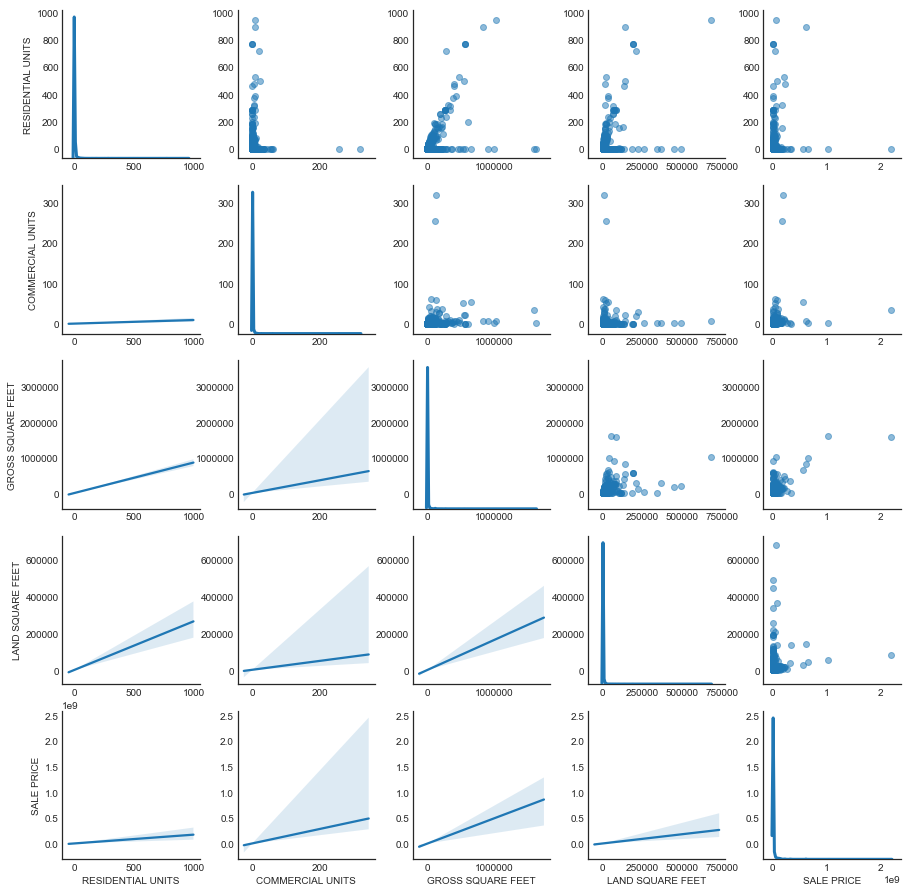

In [39]:
# Make a copy of the data to add jitter to and plot.
df_sales_jittered = df_sales.loc[:, 'RESIDENTIAL UNITS':'SALE PRICE'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_sales_jittered.shape)),
    columns=df_sales_jittered.columns
)
# Combine the data and the noise.
df_sales_jittered = df_sales_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_sales_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

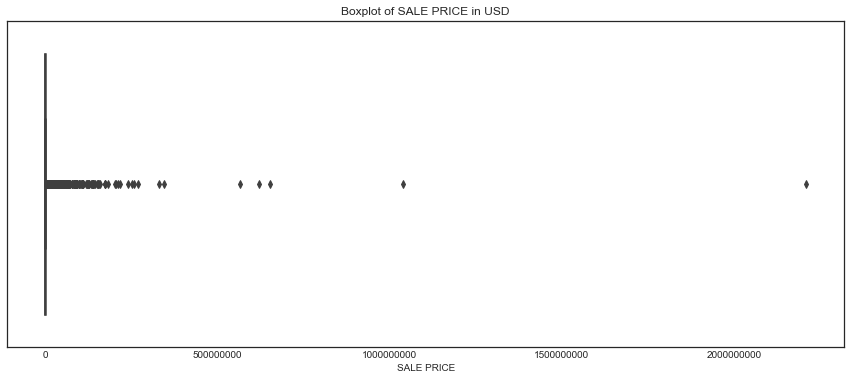

In [40]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df_sales)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

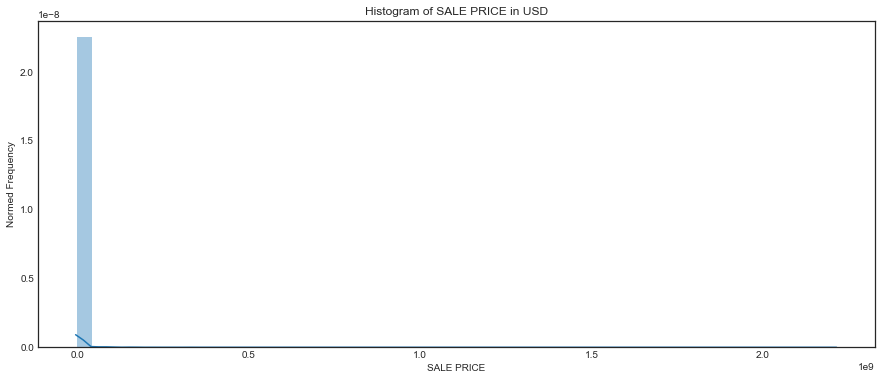

In [41]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df_sales['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

In [62]:
# Remove observations that fall outside those caps
df_sales_nonoutliers = df_sales[(df_sales['SALE PRICE'] > 100000) & (df_sales['SALE PRICE'] < 5000000) & (df_sales['RESIDENTIAL UNITS'] > 0) & (df_sales['GROSS SQUARE FEET'] > 0) & (df_sales['GROSS SQUARE FEET'] < 10000)]

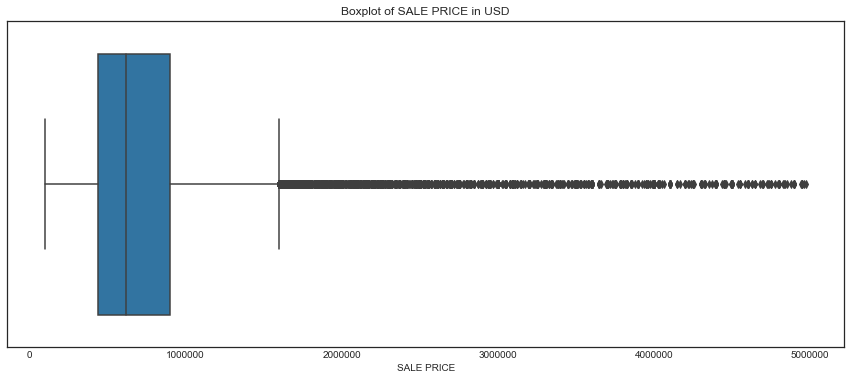

In [57]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df_sales_nonoutliers)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

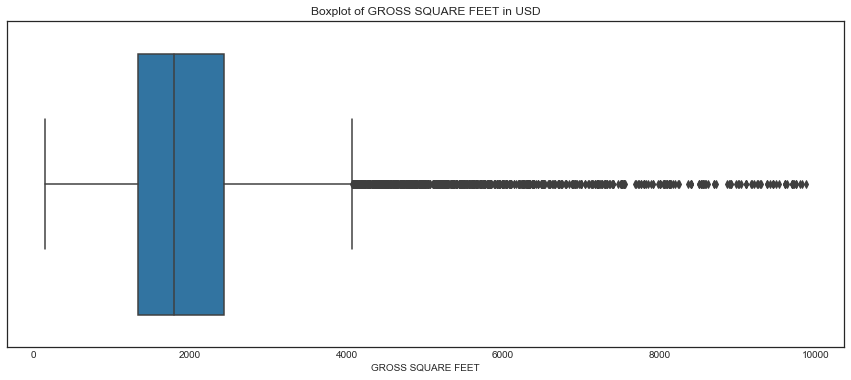

In [63]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='GROSS SQUARE FEET', data=df_sales_nonoutliers)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of GROSS SQUARE FEET in USD')
plt.show()

In [98]:
# Make a copy of the data to add jitter to and plot.
df_sales_nonoutliers_jittered = df_sales_nonoutliers.loc[:, 'RESIDENTIAL UNITS':'SALE PRICE'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_sales_jittered.shape)),
    columns=df_sales_nonoutliers_jittered.columns
)
# Combine the data and the noise.
ddf_sales_nonoutliers_jittered = df_sales_nonoutliers_jittered.add(jitter)


#Re-run scatter and regplots on dataset without outliers
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(ddf_sales_nonoutliers_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

ValueError: Shape of passed values is (5, 61646), indices imply (13, 61646)

                   RESIDENTIAL UNITS  COMMERCIAL UNITS  GROSS SQUARE FEET  \
RESIDENTIAL UNITS           1.000000          0.131112           0.693402   
COMMERCIAL UNITS            0.131112          1.000000           0.289372   
GROSS SQUARE FEET           0.693402          0.289372           1.000000   
LAND SQUARE FEET           -0.097055         -0.034101           0.098129   
SALE PRICE                  0.385817          0.178085           0.522872   

                   LAND SQUARE FEET  SALE PRICE  
RESIDENTIAL UNITS         -0.097055    0.385817  
COMMERCIAL UNITS          -0.034101    0.178085  
GROSS SQUARE FEET          0.098129    0.522872  
LAND SQUARE FEET           1.000000    0.041709  
SALE PRICE                 0.041709    1.000000  


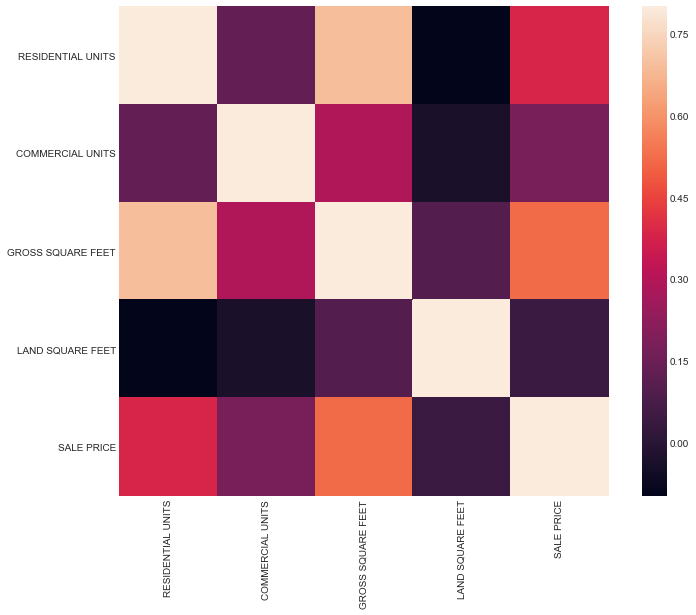

In [66]:
# Make the correlation matrix.
corrmat = df_sales_nonoutliers.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


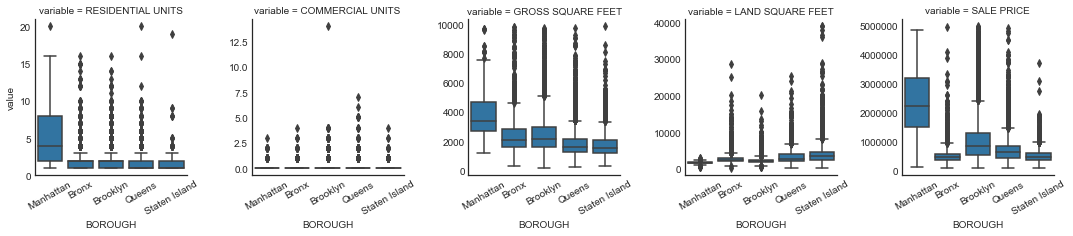

              COMMERCIAL UNITS                                                \
                         count      mean       std  min  25%  50%  75%   max   
BOROUGH                                                                        
Bronx                   3034.0  0.041200  0.238034  0.0  0.0  0.0  0.0   4.0   
Brooklyn                7574.0  0.092818  0.386923  0.0  0.0  0.0  0.0  14.0   
Manhattan                238.0  0.193277  0.524140  0.0  0.0  0.0  0.0   3.0   
Queens                 10204.0  0.039592  0.263051  0.0  0.0  0.0  0.0   7.0   
Staten Island           4763.0  0.017636  0.160401  0.0  0.0  0.0  0.0   4.0   

              GROSS SQUARE FEET                 ...     RESIDENTIAL UNITS  \
                          count         mean    ...                   75%   
BOROUGH                                         ...                         
Bronx                    3034.0  2321.080751    ...                   2.0   
Brooklyn                 7574.0  2420.299974    ...

In [85]:
# Plot all the variables with boxplots for each borough.



# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_sales_nonoutliers
df_long = pd.melt(df_long, id_vars=['BOROUGH'])



g = sns.FacetGrid(df_long, col="variable", sharey=False)
g = g.map(sns.boxplot, "BOROUGH", "value")
g.set_xticklabels(rotation=30)
plt.show()

# Descriptive statistics by group.
print(df_sales_nonoutliers.groupby('BOROUGH').describe())

# Test whether group differences are significant.
for col in df_sales_nonoutliers.loc[:,'RESIDENTIAL UNITS':'SALE PRICE'].columns:
    print(col)
    print(stats.ttest_ind(
        df_sales_nonoutliers[df_sales_nonoutliers['BOROUGH'] == 'Brooklyn'][col].dropna(),
        df_sales_nonoutliers[df_sales_nonoutliers['BOROUGH'] == 'Manhattan'][col].dropna()
    ))

c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

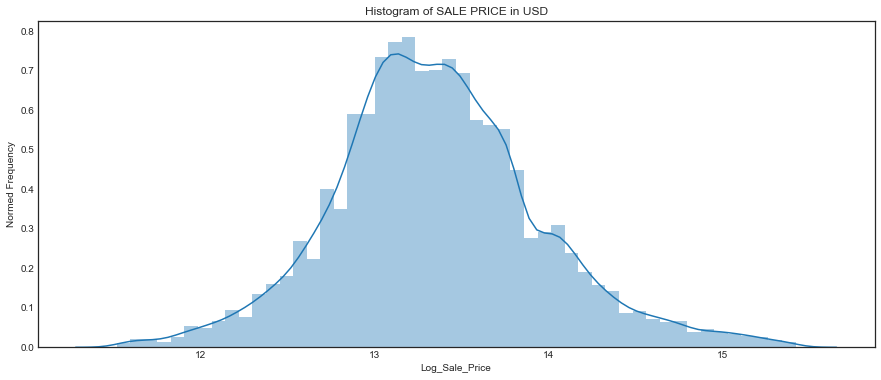

In [106]:
df_sales_nonoutliers['Less_1500'] = np.where(df_sales_nonoutliers['GROSS SQUARE FEET'] <= 1500, 1, 0)
df_sales_nonoutliers['In_City'] = np.where(df_sales_nonoutliers['BOROUGH'] == 'Manhattan', 1, 0)
df_sales_nonoutliers['Is_Big_Building'] = np.where(df_sales_nonoutliers['RESIDENTIAL UNITS'] >= 3, 1, 0)
df_sales_nonoutliers['Is_Luxury'] = np.where(df_sales_nonoutliers['SALE PRICE'] >= 2000000, 1, 0)
df_sales_nonoutliers['Is_Affordable'] = np.where(df_sales_nonoutliers['SALE PRICE'] <= 1000000, 1, 0)
df_sales_nonoutliers['hasBusiness'] = np.where(df_sales_nonoutliers['COMMERCIAL UNITS'] >= 1, 1, 0)
df_sales_nonoutliers['Affordable_BigBuilding'] = df_sales_nonoutliers['Is_Affordable'] * df_sales_nonoutliers['Is_Big_Building'] 
df_sales_nonoutliers['Log_Sale_Price'] = np.log(df_sales_nonoutliers['SALE PRICE'])
df_sales_nonoutliers['PPSF'] = df_sales_nonoutliers['SALE PRICE']/df_sales_nonoutliers['GROSS SQUARE FEET']
df_sales_nonoutliers['PPRU'] = df_sales_nonoutliers['SALE PRICE']/df_sales_nonoutliers['RESIDENTIAL UNITS']


#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df_sales_nonoutliers['Log_Sale_Price'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()


In [103]:

#normalized_df=(df-df.mean())/df.std()

# Select only numeric variables to scale.
df_num = df_sales_nonoutliers.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)
df_scaled.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,SALE PRICE,Less_1500,In_City,Is_Big_Building,Is_Luxury,hasBusiness,Is_Affordable,Affordable_BigBuilding,Log_Sale_Price,PPSF,PPRU
0,6.647356,-0.179753,4.465088,-0.396576,5.531124,-0.734265,10.366194,2.438151,4.846701,-0.210776,-2.153429,-0.29012,3.058633,0.836415,-0.269147
1,5.025248,-0.179753,2.047057,-0.679486,4.233455,-0.734265,10.366194,2.438151,4.846701,-0.210776,-2.153429,-0.29012,2.708099,1.628285,-0.254527
2,0.969978,3.226984,1.231630,-0.804139,4.420504,-0.734265,10.366194,2.438151,4.846701,4.744376,-2.153429,-0.29012,2.763381,2.647049,1.616078
3,2.592086,3.226984,1.564016,-0.663768,6.951496,-0.734265,10.366194,2.438151,4.846701,4.744376,-2.153429,-0.29012,3.373308,3.982862,1.215746
4,5.836302,-0.179753,4.028185,-0.779208,1.424927,-0.734265,10.366194,2.438151,-0.206326,-0.210776,-2.153429,-0.29012,1.534105,-0.643329,-0.850015


                        RESIDENTIAL UNITS  COMMERCIAL UNITS  \
RESIDENTIAL UNITS                1.000000          0.131112   
COMMERCIAL UNITS                 0.131112          1.000000   
GROSS SQUARE FEET                0.693402          0.289372   
LAND SQUARE FEET                -0.097055         -0.034101   
SALE PRICE                       0.385817          0.178085   
Less_1500                       -0.370229         -0.119261   
In_City                          0.244792          0.046178   
Is_Big_Building                  0.727442          0.087917   
Is_Luxury                        0.271101          0.142305   
hasBusiness                      0.119595          0.852818   
Is_Affordable                   -0.340874         -0.148697   
Affordable_BigBuilding           0.405520          0.016897   
Log_Sale_Price                   0.345016          0.147016   
PPSF                            -0.072740         -0.014520   
PPRU                            -0.269609          0.07

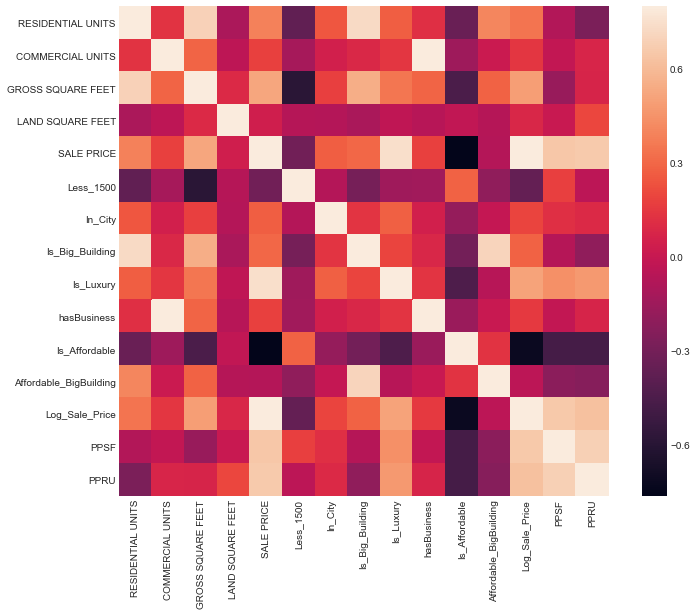

In [107]:
# Make the correlation matrix.
corrmat = df_scaled.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

The following variables are highly correlated with other variables (not sale price) and can therefore be removed: 

-Is Affordable

-HasBusiness

-PPRU

-Sale Price (can be replaced by Log sale price)

In [114]:
df_scaled.drop(columns=['SALE PRICE', 'PPRU','Is_Affordable','hasBusiness'], axis=1, inplace=True)
df_scaled_pca = df_scaled
df_scaled_pca.drop(columns=['Log_Sale_Price'], axis=1, inplace=True)
df_scaled_pca.head()



,RESIDENTIAL UNITS,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,Less_1500,In_City,Is_Big_Building,Is_Luxury,Affordable_BigBuilding,PPSF
0,6.647356,-0.179753,4.465088,-0.396576,-0.734265,10.366194,2.438151,4.846701,-0.29012,0.836415
1,5.025248,-0.179753,2.047057,-0.679486,-0.734265,10.366194,2.438151,4.846701,-0.29012,1.628285
2,0.969978,3.226984,1.231630,-0.804139,-0.734265,10.366194,2.438151,4.846701,-0.29012,2.647049
3,2.592086,3.226984,1.564016,-0.663768,-0.734265,10.366194,2.438151,4.846701,-0.29012,3.982862
4,5.836302,-0.179753,4.028185,-0.779208,-0.734265,10.366194,2.438151,-0.206326,-0.29012,-0.643329


In [117]:
sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(df_scaled_pca)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.31879124  0.16643334  0.12133521  0.09983404  0.08819798  0.07670524
  0.05151261  0.04224388  0.01904939  0.01589707]
